In [1]:
## INITIAL LOADS AND CONSTANTS DEFINITION
#----------------------------------------#
load DadosProjeto1_TurmaM.mat
n=98;

In [2]:
## AUXILIAR FUNCTIONS
#----------------------#

### Calculates the number of persons known by RA{i}
function y = acquaintances(A, i)
    y=sum(A(i, :));
end

In [3]:
## GENERATING THE PROBABILITY MATRIX

#P(i,j) =   A(j, i)/acquaintances(A,j), if j knows at least one person
#           1/n, otherwise
#It means that the probability of i be indicated by j is equal to the probability of j indicate i from in
#its acquaintance spectre (or in the glabal spectre, in case j knows nobody).
#--------------------------------------------------#

stand=1/n;
for i=1:n
    for j=1:n
        
        if acquaintances(A, j) == 0
            P(i,j)=stand;
        else 
            P(i,j)=(A(j, i)/acquaintances(A,j));
        end
        
        if i==j
            P(i,j)=0;
        end
        
    
    end

end

In [4]:
## CALCULATING REPRESENTATIVITY
#------------------------------#

#Defining the damping factors
alpha = 0.85;
v = zeros(n,1) + 1/n;

#Calculating the representativity matrix R
for i=1:n
    for j=1:n
        if i==j
            R(i,j)=(-(1/alpha));
        else
            R(i,j)=P(i,j);
        end
    end
end

#Calculating the damping matrix D
D=((alpha-1)/alpha)*v;

In [5]:
# Solving the Linear Sistem Rx=D
x=R\D;

In [6]:
# Finding the index of the two maximum values of representativity 
s=sort(x);

#delegate
for i=1:n
    if x(i)==s(n)
        delegate=i;
    end
end

#vice-delegate
for i=1:n
    if x(i)==s(n-1)
        vice_delegate=i;
    end
end

In [7]:
# Returning the results:
printf("O Representante é o RA: %d, com representatividade %d\n", RA{delegate}, x(delegate));
printf("O Vice-Representante é o RA: %d, com representatividade %d\n", RA{vice_delegate}, x(vice_delegate));

O Representante é o RA: 217192, com representatividade 0.0744902
O Vice-Representante é o RA: 213268, com representatividade 0.0720831


In [8]:
#Finding the number of acquaintances of the delegate and the vice-delegate
#-------------------------------#
printf("O Representante conhece %d pessoa(s) \n",acquaintances(A, delegate))
printf("O Vice-representante conhece %d pessoa(s) \n",acquaintances(A, vice_delegate))

#Finding the number of persons that know the delegate and the vice-delegate
#-------------------------------#
printf("**********************\n")
printf("O Representante é conhecido por %d pessoa(s) \n",sum(A(:,delegate)))
printf("O Vice-representante é conhecido por %d pessoa(s) \n",sum(A(:,vice_delegate)))

#Finding the most known person#
#-------------------------------#
for i=1:n
    k(i)=sum(A(:,i));
end
o=sort(k);

for i=1:n
    if k(i)==o(n-1)
    segundo=i;
    endif
end
printf("**********************\n")

printf("A pessoa mais conhecida é conhecida por %d pessoas\n", o(n))
printf("A segunda pessoa mais conhecida é conhecida por %d pessoas, e tem representatividade %d", o(n-1), x(segundo))

O Representante conhece 1 pessoa(s) 
O Vice-representante conhece 1 pessoa(s) 
**********************
O Representante é conhecido por 19 pessoa(s) 
O Vice-representante é conhecido por 16 pessoa(s) 
**********************
A pessoa mais conhecida é conhecida por 19 pessoas
A segunda pessoa mais conhecida é conhecida por 18 pessoas, e tem representatividade 0.0140012

In [9]:
## MANIPULATING ALPHA
#------------------------------#

#Defining the damping factors
indice=1;
v = zeros(n,1)+1/n;

for i=0.01:0.01:0.99
    alpha = i;
    #Calculating the representativity matrix R
    for i=1:n
        for j=1:n
            if i==j
                R(i,j)=(P(i,i)-(1/alpha));
            else
                R(i,j)=P(i,j);
            end
        end
    end

    #Calculating the damping matrix D
    D=((alpha-1)/alpha)*v;
    x=R\D;
    tr(indice)=x(8);
    rep(indice)=max(x);
    indice++;
end

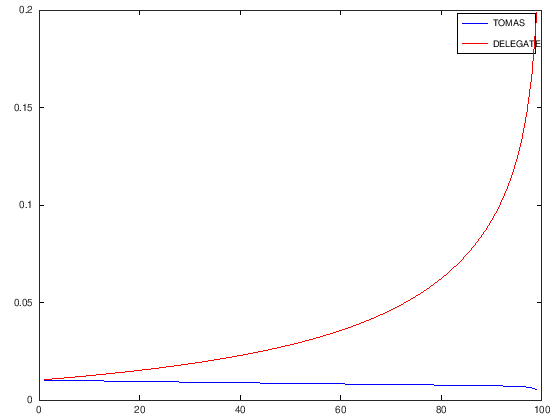

In [10]:
plot(tr, 'b', rep, 'r')
legend('TOMAS', 'DELEGATE')

In [11]:
## MANIPULATING ALPHA
#------------------------------#

#Defining the damping factors
indice=1;
v = zeros(n,1);
v(8)=1;
for i=0.01:0.01:0.99
    alpha = i;
    #Calculating the representativity matrix R
    for i=1:n
        for j=1:n
            if i==j
                R(i,j)=(P(i,i)-(1/alpha));
            else
                R(i,j)=P(i,j);
            end
        end
    end

    #Calculating the damping matrix D
    D=((alpha-1)/alpha)*v;
    x=R\D;
    tr(indice)=x(8);
    rep(indice)=max(x);
    indice++;
end

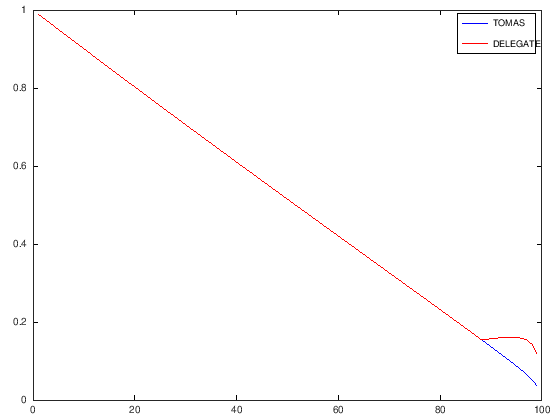

In [12]:
plot(tr, 'b', rep, 'r')
legend('TOMAS', 'DELEGATE')
